# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Scaling the data
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [ ]:
pd.set_option('display.max_columns',None)

# Data Import

In [ ]:
data= pd.read_csv('ovarian_cancer_post_mean.csv')

In [ ]:
data

Unnamed: 0        AFP     AG   Age   ALB    ALP   ALT   AST  BASO#  \
0             0  34.240000  23.98  61.0  39.9   95.0   9.0  13.0   0.02   
1             1   2.750000  16.60  45.0  39.2   26.0  16.0  17.0   0.05   
2             2   3.030000  24.05  76.0  50.4   76.0  16.0  23.0   0.04   
3             3   4.000000  23.29  63.0  44.6   71.0  14.0  23.0   0.01   
4             4   3.068818  16.06  65.0  45.6  130.0  32.0  16.0   0.04   
..          ...        ...    ...   ...   ...    ...   ...   ...    ...   
114         114   3.270000  19.62  65.0  41.3   73.0  16.0  23.0   0.03   
115         115   5.840000  22.80  50.0  45.4   55.0  18.0  19.0   0.06   
116         116   4.890000   9.50  67.0  44.0   76.0  13.0  24.0   0.04   
117         117   7.430000   7.10  58.0  45.7   83.0  12.0  14.0   0.01   
118         118   2.830000  19.23  59.0  45.8   83.0   9.0  16.0   0.02   

     BASO%   BUN    Ca    CA125     CA19-9      CA72-4       CEA     CL  \
0     0.30  3.21  2.62  2444.00  19.980000   22.119355  2.460000  100.1   
1     0.74  5.27  2.35  2555.00  18.410000  131.600000  0.820000  103.2   
2     0.50  5.05  2.68    39.83   1.970000   22.119355  3.450000  103.5   
3     0.20  4.90  2.35    16.65  79.080000   22.119355  2.190000  104.0   
4     0.70  2.25  2.63  3271.00  51.328455   22.119355  2.871727  106.6   
..     ...   ...   ...      ...        ...         ...       ...    ...   
114   0.70  5.23  2.71     8.54   4.310000   22.119355  2.770000  103.0   
115   0.60  5.49  2.63     5.12   5.320000   22.119355  1.900000  101.4   
116   0.60  5.86  1.13    15.06  32.680000   22.119355  4.040000  101.5   
117   0.20  5.31  1.07    17.72  28.080000   22.119355  3.710000  102.5   
118   0.60  4.38  2.65    51.33   2.180000   22.119355  2.310000  102.3   

     CO2CP  CREA  DBIL   EO#   EO%   GGT   GLO   GLU.    HCT      HE4    HGB  \
0     22.3  45.0   2.6  0.04  0.50  13.0  32.1  10.50  0.417   934.10  128.0   
1     24.0  65.7   2.9  0.00  0.07  17.0  26.9   4.76  0.372   853.50  123.0   
2     21.9  68.0   2.3  0.34  3.90  17.0  26.6   5.67  0.437   535.90  140.0   
3     23.0  74.0   1.9  0.01  0.20  18.0  25.2   5.50  0.377    96.47  119.0   
4     28.5  49.0   1.4  0.02  0.30  39.0  34.0   4.94  0.396  1352.00  123.0   
..     ...   ...   ...   ...   ...   ...   ...    ...    ...      ...    ...   
114   22.2  72.0   3.2  0.12  2.60  24.0  33.1   6.14  0.400    61.08  135.0   
115   23.1  56.0   3.5  0.13  1.30   8.0  25.5   5.54  0.374    41.34  123.0   
116   24.5  51.0   2.7  0.08  1.30  12.0  30.9   6.11  0.421    55.23  132.0   
117   19.9  73.0   3.4  0.10  1.70  15.0  34.2   5.39  0.432    54.94  154.0   
118   27.1  50.0   4.0  0.05  1.50  13.0  22.6   5.90  0.439    42.65  144.0   

     IBIL     K  LYM#  LYM%   MCH   MCV    Mg  MONO#  MONO%    MPV     Na  \
0     4.2  4.38  1.27  17.2  26.2  85.3  0.82   0.41   5.50  10.00  142.0   
1     8.0  4.70  1.73  27.2  30.6  92.6  1.11   0.42   6.55   7.38  139.1   
2     5.1  4.75  1.79  20.5  30.4  94.8  0.86   0.37   4.20  12.00  144.7   
3     4.2  4.33  0.89  18.2  30.1  95.4  0.88   0.36   7.40   8.90  141.6   
4     3.0  4.26  1.30  22.2  28.4  91.5  1.01   0.35   6.00   9.70  146.9   
..    ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
114   5.9  4.32  1.02  22.5  29.7  87.9  0.91   0.20   4.40   9.80  140.5   
115   7.2  4.00  1.30  12.7  31.6  96.1  0.95   0.38   3.70  11.20  143.3   
116   6.5  4.30  1.69  27.1  28.8  91.7  1.00   0.32   5.10  12.60  143.0   
117   7.4  4.15  1.48  25.9  30.2  89.0  0.92   0.25   4.40  11.80  144.2   
118   9.8  4.63  1.10  32.7  29.4  89.8  0.92   0.13   3.90   9.70  144.0   

           NEU   PCT   PDW  PHOS    PLT   RBC   RDW  TBIL    TP     UA  TYPE  
0    76.500000  0.30  11.2  1.09  304.0  4.89  12.7   6.8  72.0  119.2   0.0  
1    65.500000  0.25  17.4  1.25  339.0  4.01  14.6  10.9  66.1  215.6   0.0  
2    70.900000  0.24  15.1  1.17  205.0  4.61  12.8   7.4  77.0  334.2   0.0  
3

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na',
       'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA',
       'TYPE'],
      dtype='object')

In [ ]:
X = data.drop(columns=['TYPE'])
y = data['TYPE']

In [ ]:
y.value_counts()

TYPE
0.0    96
1.0    23
Name: count, dtype: int64

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    96
0    23
Name: count, dtype: int64

# Correlation Analysis

In [ ]:
dt= data
dt

AFP     AG   Age   ALB    ALP   ALT   AST  BASO#  BASO%   BUN  \
0    34.240000  23.98  61.0  39.9   95.0   9.0  13.0   0.02   0.30  3.21   
1     2.750000  16.60  45.0  39.2   26.0  16.0  17.0   0.05   0.74  5.27   
2     3.030000  24.05  76.0  50.4   76.0  16.0  23.0   0.04   0.50  5.05   
3     4.000000  23.29  63.0  44.6   71.0  14.0  23.0   0.01   0.20  4.90   
4     3.068818  16.06  65.0  45.6  130.0  32.0  16.0   0.04   0.70  2.25   
..         ...    ...   ...   ...    ...   ...   ...    ...    ...   ...   
114   3.270000  19.62  65.0  41.3   73.0  16.0  23.0   0.03   0.70  5.23   
115   5.840000  22.80  50.0  45.4   55.0  18.0  19.0   0.06   0.60  5.49   
116   4.890000   9.50  67.0  44.0   76.0  13.0  24.0   0.04   0.60  5.86   
117   7.430000   7.10  58.0  45.7   83.0  12.0  14.0   0.01   0.20  5.31   
118   2.830000  19.23  59.0  45.8   83.0   9.0  16.0   0.02   0.60  4.38   

       Ca    CA125     CA19-9      CA72-4       CEA     CL  CO2CP  CREA  DBIL  \
0    2.62  2444.00  19.980000   22.119355  2.460000  100.1   22.3  45.0   2.6   
1    2.35  2555.00  18.410000  131.600000  0.820000  103.2   24.0  65.7   2.9   
2    2.68    39.83   1.970000   22.119355  3.450000  103.5   21.9  68.0   2.3   
3    2.35    16.65  79.080000   22.119355  2.190000  104.0   23.0  74.0   1.9   
4    2.63  3271.00  51.328455   22.119355  2.871727  106.6   28.5  49.0   1.4   
..    ...      ...        ...         ...       ...    ...    ...   ...   ...   
114  2.71     8.54   4.310000   22.119355  2.770000  103.0   22.2  72.0   3.2   
115  2.63     5.12   5.320000   22.119355  1.900000  101.4   23.1  56.0   3.5   
116  1.13    15.06  32.680000   22.119355  4.040000  101.5   24.5  51.0   2.7   
117  1.07    17.72  28.080000   22.119355  3.710000  102.5   19.9  73.0   3.4   
118  2.65    51.33   2.180000   22.119355  2.310000  102.3   27.1  50.0   4.0   

      EO#   EO%   GGT   GLO   GLU.    HCT      HE4    HGB  IBIL     K  LYM#  \
0    0.04  0.50  13.0  32.1  10.50  0.417   934.10  128.0   4.2  4.38  1.27   
1    0.00  0.07  17.0  26.9   4.76  0.372   853.50  123.0   8.0  4.70  1.73   
2    0.34  3.90  17.0  26.6   5.67  0.437   535.90  140.0   5.1  4.75  1.79   
3    0.01  0.20  18.0  25.2   5.50  0.377    96.47  119.0   4.2  4.33  0.89   
4    0.02  0.30  39.0  34.0   4.94  0.396  1352.00  123.0   3.0  4.26  1.30   
..    ...   ...   ...   ...    ...    ...      ...    ...   ...   ...   ...   
114  0.12  2.60  24.0  33.1   6.14  0.400    61.08  135.0   5.9  4.32  1.02   
115  0.13  1.30   8.0  25.5   5.54  0.374    41.34  123.0   7.2  4.00  1.30   
116  0.08  1.30  12.0  30.9   6.11  0.421    55.23  132.0   6.5  4.30  1.69   
117  0.10  1.70  15.0  34.2   5.39  0.432    54.94  154.0   7.4  4.15  1.48   
118  0.05  1.50  13.0  22.6   5.90  0.439    42.65  144.0   9.8  4.63  1.10   

     LYM%   MCH   MCV    Mg  MONO#  MONO%    MPV     Na        NEU   PCT  \
0    17.2  26.2  85.3  0.82   0.41   5.50  10.00  142.0  76.500000  0.30   
1    27.2  30.6  92.6  1.11   0.42   6.55   7.38  139.1  65.500000  0.25   
2    20.5  30.4  94.8  0.86   0.37   4.20  12.00  144.7  70.900000  0.24   
3    18.2  30.1  95.4  0.88   0.36   7.40   8.90  141.6  74.000000  0.19   
4    22.2  28.4  91.5  1.01   0.35   6.00   9.70  146.9  70.800000  0.30   
..    ...   ...   ...   ...    ...    ...    ...    ...        ...   ...   
114  22.5  29.7  87.9  0.91   0.20   4.40   9.80  140.5  70.221524  0.20   
115  12.7  31.6  96.1  0.95   0.38   3.70  11.20  143.3  70.221524  0.24   
116  27.1  28.8  91.7  1.00   0.32   5.10  12.60  143.0  70.221524  0.18   
117  25.9  30.2  89.0  0.92   0.25   4.40  11.80  144.2  70.221524  0.22   
118  32.7  29.4  89.8  0.92   0.13   3.90   9.70  144.0  70.221524  0.21   

      PDW  PHOS    PLT   RBC   RDW  TBIL    TP     UA  TYPE  
0    11.2  1.09  304.0  4.89  12.7   6.8  72.0  119.2   0.0  
1    17.4  1.25  339.0  4.01  14.6  10.9  66.1  215.6   0.0  
2    15.1  1.17  205.0  4.61  12.8   7.4  77.0  334.2   0.0  
3     8.8  1.38

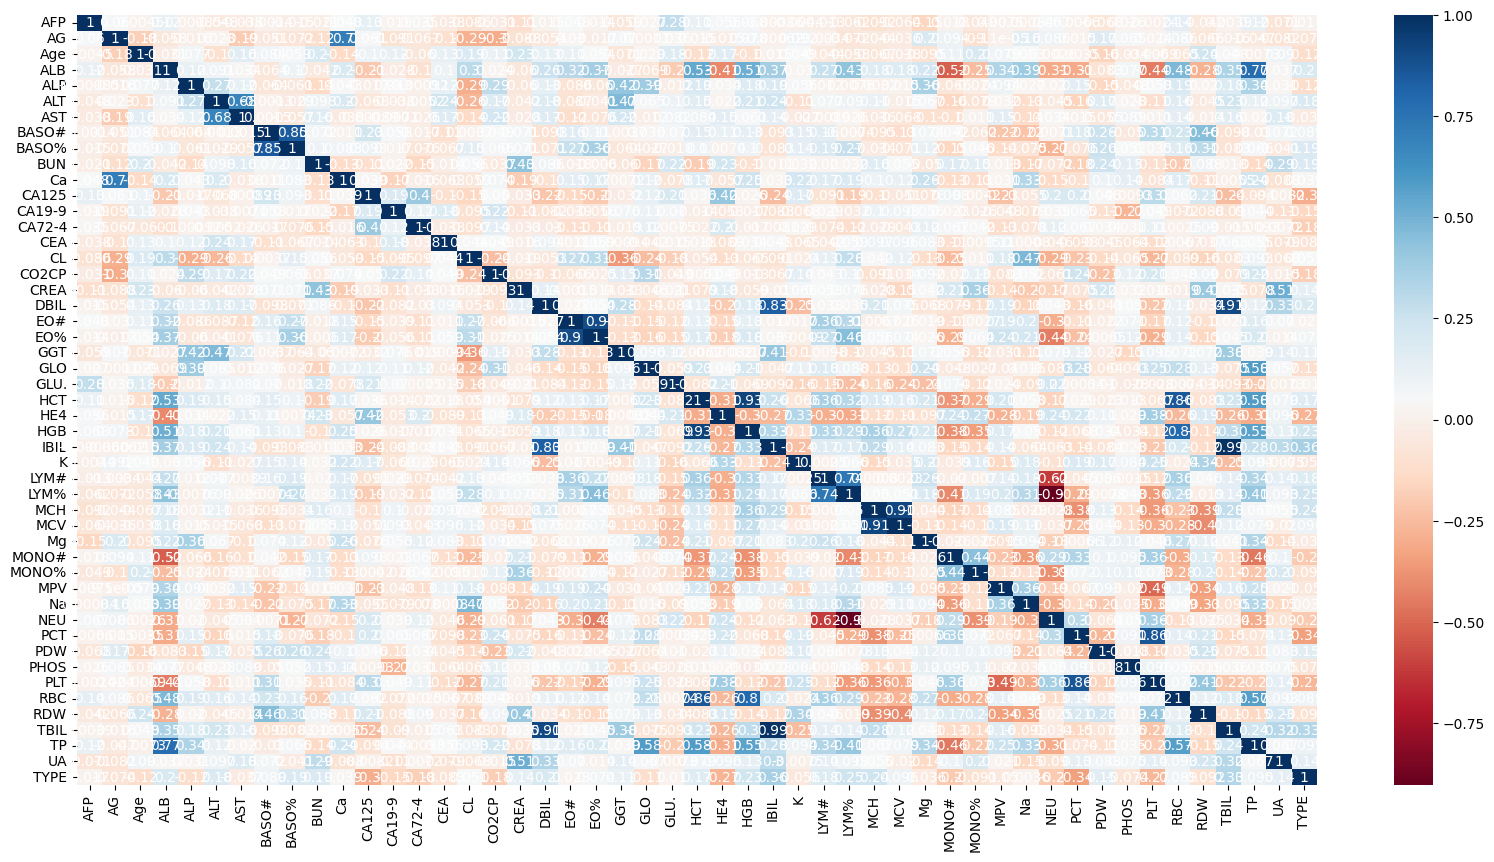

In [ ]:
corr = dt.corr()

plt.figure(figsize=(20,10)) # this sets the size of the figure to width=10 inches, height=8 inches
sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size": 10, "color": "white"})
plt.show()

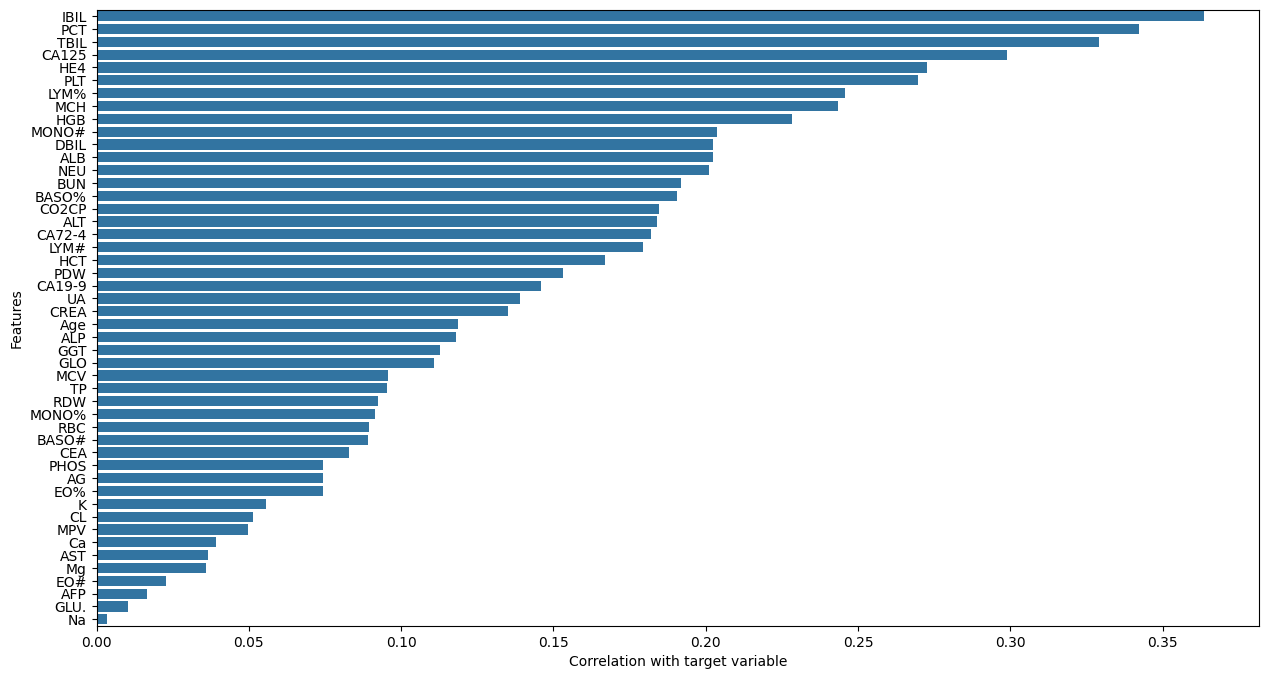

Column names of the 10 best features:
Index(['IBIL', 'PCT', 'TBIL', 'CA125', 'HE4', 'PLT', 'LYM%', 'MCH', 'HGB',
       'MONO#'],
      dtype='object')


In [ ]:
#calculate correlation
corr = abs(X.corrwith(y))

# sort correlation values in descending order
corr = corr.sort_values(ascending=False)

# number of top k correlation features
k = 10

# get the top k correlation features
top_k_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
sns.barplot(x=corr.values, y=corr.index)
plt.xlabel('Correlation with target variable')
plt.ylabel('Features')
plt.show()

print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_k_features)

***Top 10 Features***

In [ ]:
# number of top k correlation features
k = 10

# get the top k correlation features
top_10_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
#sns.barplot(x=top_k_features.values, y=top_k_features.index)
#plt.xlabel('Correlation with target variable')
#plt.ylabel('Features')
#plt.show()

#print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_10_features)

Index(['IBIL', 'PCT', 'TBIL', 'CA125', 'HE4', 'PLT', 'LYM%', 'MCH', 'HGB',
       'MONO#'],
      dtype='object')


<Figure size 1500x800 with 0 Axes>

***Top 7 Features***

In [ ]:
# number of top k correlation features
k = 7

# get the top k correlation features
top_7_features = corr.index[:k]
corr_features = top_k_features

plt.figure(figsize=(15,8))
# plot the correlation values in a bar plot
#sns.barplot(x=top_k_features.values, y=top_k_features.index)
#plt.xlabel('Correlation with target variable')
#plt.ylabel('Features')
#plt.show()

#print("Column names of the {} best features:".format(k))
#print the column names of top k correlation features
print(top_7_features)

Index(['IBIL', 'PCT', 'TBIL', 'CA125', 'HE4', 'PLT', 'LYM%'], dtype='object')


<Figure size 1500x800 with 0 Axes>

# Classification models and metrics define

In [ ]:
knn= KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
svm= SVC(random_state=10,kernel='rbf')
lr = LogisticRegression()

rf= RandomForestClassifier(n_jobs=-1,random_state=10)
ada= AdaBoostClassifier(random_state=100)

lgbm = LGBMClassifier(n_jobs=-1,random_state=10)
grad = GradientBoostingClassifier()
xg = XGBClassifier(use_label_encoder =False, eval_metric='logloss')

In [ ]:
scores={'accuracy': make_scorer(accuracy_score),
        'recall' : make_scorer(recall_score),
        'specificity':make_scorer(recall_score,pos_label=0),
        'gmean': make_scorer(geometric_mean_score),
        'roc': make_scorer(roc_auc_score),
        'precision': make_scorer(precision_score),
        'mcc':  make_scorer(matthews_corrcoef)
        }

# Performance of classifiers on top 10 features using Corr

In [ ]:
#selected_features = corr[corr> 0.25].index

In [ ]:
#selected_features

# Standardization

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[top_10_features]

In [ ]:
x.columns

Index(['IBIL', 'PCT', 'TBIL', 'CA125', 'HE4', 'PLT', 'LYM%', 'MCH', 'HGB',
       'MONO#'],
      dtype='object')

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    96
0    23
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            26.575201
score_time           4.761379
test_accuracy       94.924242
test_recall         97.777778
test_specificity    83.333333
test_gmean          89.013537
test_roc            90.555556
test_precision      96.090909
test_mcc            84.197157
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.155933
score_time           5.035925
test_accuracy       82.348485
test_recall         92.444444
test_specificity    40.000000
test_gmean          49.881893
test_roc            66.222222
test_precision      86.949495
test_mcc            35.510460
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.337496
score_time           1.594968
test_accuracy       83.181818
test_recall         96.666667
test_specificity    26.666667
test_gmean          39.096683
test_roc            61.666667
test_precision      84.616162
test_mcc            30.178427
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             1.995521
score_time           5.478365
test_accuracy       84.924242
test_recall         93.555556
test_specificity    50.000000
test_gmean          60.444607
test_roc            71.777778
test_precision      88.606061
test_mcc            47.415933
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            12.730575
score_time           2.699382
test_accuracy       91.666667
test_recall         92.666667
test_specificity    88.333333
test_gmean          89.401790
test_roc            90.500000
test_precision      97.000000
test_mcc            77.483811
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            21.167574
score_time           4.135466
test_accuracy       93.257576
test_recall         96.777778
test_specificity    80.000000
test_gmean          86.665335
test_roc            88.388889
test_precision      95.090909
test_mcc            79.689091
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            14.437804
score_time           1.583390
test_accuracy       92.348485
test_recall         95.666667
test_specificity    80.000000
test_gmean          82.652658
test_roc            87.833333
test_precision      95.252525
test_mcc            74.801043
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             3.661187
score_time           1.709771
test_accuracy       93.257576
test_recall         96.888889
test_specificity    80.000000
test_gmean          82.514498
test_roc            88.444444
test_precision      95.590909
test_mcc            77.939724
dtype: float64

# Performance of classifiers on top 7 features using Corr

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[top_7_features]

In [ ]:
x.columns

Index(['IBIL', 'PCT', 'TBIL', 'CA125', 'HE4', 'PLT', 'LYM%'], dtype='object')

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    96
0    23
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            33.606033
score_time           5.242138
test_accuracy       94.924242
test_recall         97.777778
test_specificity    83.333333
test_gmean          89.013537
test_roc            90.555556
test_precision      96.090909
test_mcc            84.197157
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.141139
score_time           3.314323
test_accuracy       80.681818
test_recall         89.444444
test_specificity    45.000000
test_gmean          52.168411
test_roc            67.222222
test_precision      87.404040
test_mcc            33.215652
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.301433
score_time           1.637268
test_accuracy       79.848485
test_recall         97.777778
test_specificity     5.000000
test_gmean           7.071068
test_roc            51.388889
test_precision      80.984848
test_mcc             3.260446
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.787463
score_time           2.543058
test_accuracy       84.924242
test_recall         95.666667
test_specificity    41.666667
test_gmean          56.058985
test_roc            68.666667
test_precision      86.878788
test_mcc            46.644495
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            13.446066
score_time           2.585027
test_accuracy       92.500000
test_recall         94.888889
test_specificity    83.333333
test_gmean          88.073346
test_roc            89.111111
test_precision      95.979798
test_mcc            78.114043
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            24.458702
score_time           2.928548
test_accuracy       93.257576
test_recall         95.777778
test_specificity    83.333333
test_gmean          87.987203
test_roc            89.555556
test_precision      96.090909
test_mcc            79.689091
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            13.305271
score_time           1.564398
test_accuracy       91.590909
test_recall         94.888889
test_specificity    80.000000
test_gmean          81.488164
test_roc            87.444444
test_precision      95.590909
test_mcc            73.431657
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             3.238664
score_time           1.706820
test_accuracy       93.257576
test_recall         96.888889
test_specificity    80.000000
test_gmean          82.514498
test_roc            88.444444
test_precision      95.590909
test_mcc            77.939724
dtype: float64

# Chi Square

Chi Square

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

In [ ]:
X = dt.drop(columns=['TYPE'])
y = dt['TYPE']

In [ ]:
chi2_selector = SelectKBest(chi2, k='all')  # k='all' to get scores for all features
chi2_selector.fit(X, y)

SelectKBest(k='all', score_func=<function chi2 at 0x7fad3d20b010>)

In [ ]:
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

In [ ]:
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': chi2_pvalues
})

In [ ]:
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

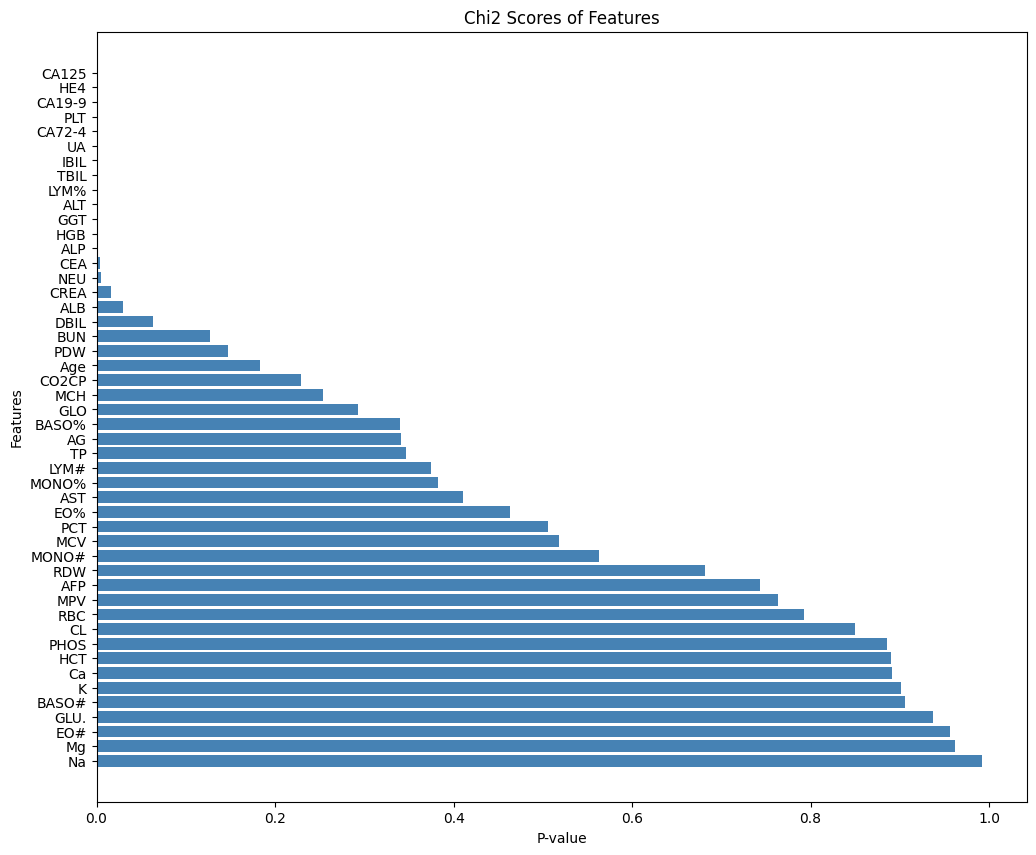

In [ ]:
plt.figure(figsize=(12, 10))
plt.barh(chi2_results['Feature'], chi2_results['P-value'], color='steelblue')
plt.xlabel('P-value')
plt.ylabel('Features')
plt.title('Chi2 Scores of Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
print(chi2_results)

   Feature    Chi2 Score        P-value
11   CA125  19418.561871   0.000000e+00
25     HE4   6797.360156   0.000000e+00
12  CA19-9    761.742757  1.122353e-167
42     PLT    459.567915  5.969260e-102
13  CA72-4     83.079483   7.881953e-20
47      UA     52.310929   4.737305e-13
27    IBIL     34.527174   4.203419e-09
45    TBIL     34.510984   4.238527e-09
30    LYM%     34.041638   5.394524e-09
5      ALT     25.801676   3.783598e-07
21     GGT     24.478854   7.512988e-07
26     HGB     13.604149   2.256862e-04
4      ALP     10.752624   1.041316e-03
14     CEA      8.127135   4.360760e-03
38     NEU      7.943894   4.824989e-03
17    CREA      5.748040   1.650706e-02
3      ALB      4.714171   2.991499e-02
18    DBIL      3.445847   6.341091e-02
9      BUN      2.332474   1.267004e-01
40     PDW      2.096649   1.476223e-01
2      Age      1.768802   1.835304e-01
16   CO2CP      1.445061   2.293221e-01
31     MCH      1.304185   2.534502e-01
22     GLO      1.107311   2.926672e-01


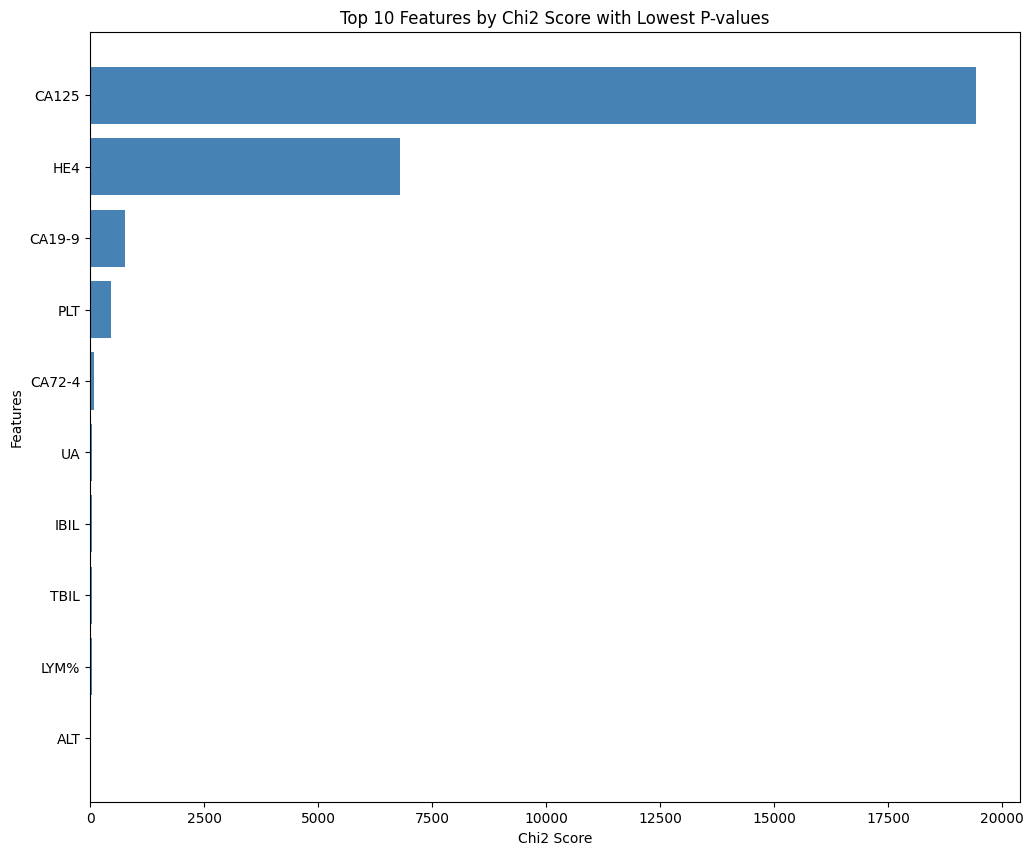

In [ ]:
top_features = chi2_results.sort_values(by='P-value').head(10)

# Plot the top 10 features
plt.figure(figsize=(12, 10))
plt.barh(top_features['Feature'], top_features['Chi2 Score'], color='steelblue')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.title('Top 10 Features by Chi2 Score with Lowest P-values')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
selected_features_chi = top_features.Feature.tolist()

In [ ]:
selected_features_chi

['CA125',
 'HE4',
 'CA19-9',
 'PLT',
 'CA72-4',
 'UA',
 'IBIL',
 'TBIL',
 'LYM%',
 'ALT']

# Performance of classifiers on selected features using Chi Square

In [ ]:
x= dt.drop("TYPE",axis=1)
y= dt["TYPE"]

In [ ]:
x = x[selected_features_chi]

In [ ]:
x.columns

Index(['CA125', 'HE4', 'CA19-9', 'PLT', 'CA72-4', 'UA', 'IBIL', 'TBIL', 'LYM%',
       'ALT'],
      dtype='object')

In [ ]:
y.value_counts()

TYPE
0.0    96
1.0    23
Name: count, dtype: int64

In [ ]:
label_mapping = {0: 1, 1: 0}
y = y.map(label_mapping)
y.value_counts()

TYPE
1    96
0    23
Name: count, dtype: int64

In [ ]:
scaler= StandardScaler()
xs= scaler.fit_transform(x)

In [ ]:
#RF
score = cross_validate(rf, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            55.957444
score_time           8.053205
test_accuracy       92.424242
test_recall         95.777778
test_specificity    80.000000
test_gmean          82.694195
test_roc            87.888889
test_precision      95.272727
test_mcc            74.878360
dtype: float64

In [ ]:
# knn
score = cross_validate(knn, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.257716
score_time           3.572004
test_accuracy       79.772727
test_recall         95.666667
test_specificity    15.000000
test_gmean          17.071068
test_roc            55.333333
test_precision      82.318182
test_mcc            10.421334
dtype: float64

In [ ]:
# svm
score = cross_validate(svm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.405104
score_time           1.573839
test_accuracy       79.848485
test_recall         98.888889
test_specificity     0.000000
test_gmean           0.000000
test_roc            49.444444
test_precision      80.454545
test_mcc            -1.740777
dtype: float64

In [ ]:
# lr
score = cross_validate(lr, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             0.857334
score_time           1.935060
test_accuracy       88.181818
test_recall         97.888889
test_specificity    50.000000
test_gmean          61.392914
test_roc            73.944444
test_precision      89.025253
test_mcc            55.003881
dtype: float64

In [ ]:
# ada
score = cross_validate(ada, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            12.465546
score_time           2.662888
test_accuracy       91.515152
test_recall         95.777778
test_specificity    73.333333
test_gmean          78.782197
test_roc            84.555556
test_precision      93.931818
test_mcc            69.828450
dtype: float64

In [ ]:
# lgbm
score = cross_validate(lgbm, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            25.655787
score_time           2.176161
test_accuracy       90.681818
test_recall         93.666667
test_specificity    80.000000
test_gmean          81.776627
test_roc            86.833333
test_precision      95.161616
test_mcc            69.805012
dtype: float64

In [ ]:
# grad
score = cross_validate(grad, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time            23.691654
score_time           2.790701
test_accuracy       92.348485
test_recall         96.888889
test_specificity    75.000000
test_gmean          75.623127
test_roc            85.944444
test_precision      94.681818
test_mcc            69.910933
dtype: float64

In [ ]:
# xgboost
score = cross_validate(xg, xs,y, cv=10, n_jobs=-1, scoring=scores)
df=pd.DataFrame(score)
df.mean()*100

fit_time             3.129947
score_time           1.713557
test_accuracy       93.257576
test_recall         96.888889
test_specificity    80.000000
test_gmean          82.694195
test_roc            88.444444
test_precision      95.500000
test_mcc            76.619136
dtype: float64